# Homework: Principal Components Analysis
### Valeria Bo (s304645),
### Federico Sisci (s304657)


First of all, we import all the package that we use in the homework and we initialize the random seed with the minimum of our ID numbers.

In [1]:
!pip install -q ipympl
%matplotlib widget

import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

rs=304645
np.random.seed(rs)

from google.colab import output
output.enable_custom_widget_manager()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00


# PART 1: Preparation of the Data

**1.1)** We create the dataset from the csv file.

In [2]:
df_tot= pd.read_csv("/content/cla4lsp_customers.csv", sep='\t')
df_tot

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

**1.1bis)** Consideration about the missing values.

It's important to understand where are all the missing value, how many are them and if they can be replaced or not.
As we can see there are only 24 missing value over a sample of 2240 costumers and all of them are in the column *Income*.

Since the number is so low, in order to mantain the truthfulness of the data, we decided to eliminate the rows with missing values instead of substitute each missing value with the average income.

In [3]:
missing=df_tot.isnull()

missing.sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Here we have all the rows with missing value of our dataset.

In [4]:
mask = df_tot.isnull().any(axis=1)
df_missing = df_tot[mask]
df_missing

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

**1.2)** Now we create a sub-DFs  extracted from df_tot such that it contains 2\3 of the original
dataframe’s number of rows.

In order to do that we saved the lenght of df_tot in the variable *l* and with *rs* as seed we randomly sampled the sub-DFs named *workdf_1*.

In [5]:
l=len(df_tot)
workdf_1=df_tot.sample(int(2/3*l), random_state= rs)

As we can see the number of missing value is now 19 instead of 24.

In [6]:
missing_sample=workdf_1.isnull()

missing_sample.sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 19
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**1.3)** Here we divide in 3 lists the columns of our dataset:
*   labels
*   features
*others

In [7]:
labels = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency']

features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Costumer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

others = ['ID', 'Z_CostContact', 'Z_Revenue']

**1.4)** We now sample a feature, from the list previously created, using the random seed rs and we remove the corresponding column from the dataset.

As we can see the number of column is now 28 instead of 29.

In [8]:
random.seed(rs)
feature_removed = random.choice(features[7:15])

workdf_modified = workdf_1.drop(feature_removed, axis = 1)
feature_removed

'MntSweetProducts'

**1.5)** At last we eliminate the rows with missing value obtaining the final dataset.

In fact now we have a dataset with 1474 row instead of the old one with 1493 row because we eliminated the 19 rows with a missing value.

In [9]:
workdf = workdf_modified.dropna(how='any')

workdf

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1639   2814        1976      Master       Together  30560.0        1   
127    3381        1953      Master        Married  54348.0        1   
339    1150        1899         PhD       Together  83532.0        0   
549    2256        1973      Master        Married  27159.0        1   
1907  10680        1986  Graduation       Together  33235.0        1   
...     ...         ...         ...            ...      ...      ...   
1938   9291        1959      Master        Married  34242.0        0   
2234   8372        1974  Graduation        Married  34421.0        1   
1164   5922        1974         PhD        Married  40344.0        0   
1669   4127        1967         PhD        Married  77766.0        0   
1116   3885        1983         PhD        Married  33569.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
1639         0  27-06-2013        6         9  ...                  7   
127          1  08-06-2014       51        70  ...                  6   
339          0  26-09-2013       36       755  ...                  1   
549          1  29-03-2014       33        17  ...                  6   
1907         0  05-02-2014       71        45  ...                  7   
...        ...         ...      ...       ...  ...                ...   
1938         1  23-03-2014       25         8  ...                  5   
2234         0  01-07-2013       81         3  ...                  7   
1164         1  13-10-2013       48       210  ...                  7   
1669         1  22-02-2013       97      1004  ...                  6   
1116         0  16-10-2013       10        16  ...                  8   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1639             0             0             0             0             0   
127              0             0             0             0             0   
339              0             0             1             0             0   
549              0             0             0             0             0   
1907             0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1938             0             0             0             0             0   
2234             0             0             0             0             0   
1164             0             0             0             0             0   
1669             1             0             0             0             0   
1116             1             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
1639         0              3         11         0  
127          0              3         11         0  
339          0              3         11         0  
549          0              3         11         0  
1907         0              3         11         0  
...        ...            ...        ...       ...  
1938         0              3         11         0  
2234         0              3         11         0  
1164         0              3         11         0  
1669         0              3         11         1  
1116         0              3         11         1  

[1474 rows x 28 columns]

# PART 2: Encoding Categorical Data

Since we have to perform a PCA analysis and we can do this only on *numerical* data, we want to have an overview of the data type present in each columns of our dataset.

In [10]:
workdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 1639 to 1116
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1474 non-null   int64  
 1   Year_Birth           1474 non-null   int64  
 2   Education            1474 non-null   object 
 3   Marital_Status       1474 non-null   object 
 4   Income               1474 non-null   float64
 5   Kidhome              1474 non-null   int64  
 6   Teenhome             1474 non-null   int64  
 7   Dt_Customer          1474 non-null   object 
 8   Recency              1474 non-null   int64  
 9   MntWines             1474 non-null   int64  
 10  MntFruits            1474 non-null   int64  
 11  MntMeatProducts      1474 non-null   int64  
 12  MntFishProducts      1474 non-null   int64  
 13  MntGoldProds         1474 non-null   int64  
 14  NumDealsPurchases    1474 non-null   int64  
 15  NumWebPurchases      1474 non-null 

As we can see from this output, not all the columns are *numerical*. \\
In particular we focus on the columns that contain *object* data that can be *categorical* or *mixed type*.

In [11]:
categories = workdf.select_dtypes(include=['object'])
print(categories)

       Education Marital_Status Dt_Customer
1639      Master       Together  27-06-2013
127       Master        Married  08-06-2014
339          PhD       Together  26-09-2013
549       Master        Married  29-03-2014
1907  Graduation       Together  05-02-2014
...          ...            ...         ...
1938      Master        Married  23-03-2014
2234  Graduation        Married  01-07-2013
1164         PhD        Married  13-10-2013
1669         PhD        Married  22-02-2013
1116         PhD        Married  16-10-2013

[1474 rows x 3 columns]


So we have to trasform the data contained in these columns in a *numerical* form. \\
To decide which method we can apply to column *Education* and *Marital_Status*, we visualize the different data values in each column and count them.

In [12]:
diff_value_Edu = categories['Education'].unique()
n_diff_value_Edu = categories['Education'].nunique()
print("Column Education:")
print(f"Different values: {diff_value_Edu}")
print(f"Number of different values: {n_diff_value_Edu}")

diff_value_Mar = categories['Marital_Status'].unique()
n_diff_value_Mar = categories['Marital_Status'].nunique()
print("Column Marital_Status:")
print(f"Different values: {diff_value_Mar}")
print(f"Number of different values: {n_diff_value_Mar}")

Column Education:
Different values: ['Master' 'PhD' 'Graduation' '2n Cycle' 'Basic']
Number of different values: 5
Column Marital_Status:
Different values: ['Together' 'Married' 'Single' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Number of different values: 8


To trasform the data we choose between *Label* and *One-Hot* encoding. \\
As we can see, the number of different values isn't big so we can apply the second type of encoding obtaining a dataset with 26+13=39 columns instead of the previous 28. Moreover, we avoid to introduce any implicit order among the categories.


In [13]:
Xworkdf = pd.get_dummies(workdf, columns = ['Education','Marital_Status'])
Xworkdf.shape

(1474, 39)

Now we have the modified columns at the end of the dataset encoded using the One-Hot Encoding and we only have to transform the data from the *Dt_Customer* column.

In order to mantain the temporal difference between the date we decided to modify the elements from *dd-mm-yyyy* to *yyyymmdd*.

In [14]:
Xworkdf['Dt_Customer'] = pd.to_datetime(Xworkdf['Dt_Customer'], format='%d-%m-%Y')

Xworkdf['Dt_Customer'] = Xworkdf['Dt_Customer'].dt.strftime('%Y%m%d')

Xworkdf['Dt_Customer'] = Xworkdf['Dt_Customer'].astype(int)

As raccomended in the project's instruction we now select only the features columns removing the labels and the others.

In [15]:
Xworkdf = Xworkdf.drop(labels, axis = 1)
Xworkdf = Xworkdf.drop(others, axis = 1)
Xworkdf

Year_Birth   Income  Kidhome  Teenhome  Dt_Customer  MntWines  \
1639        1976  30560.0        1         0     20130627         9   
127         1953  54348.0        1         1     20140608        70   
339         1899  83532.0        0         0     20130926       755   
549         1973  27159.0        1         1     20140329        17   
1907        1986  33235.0        1         0     20140205        45   
...          ...      ...      ...       ...          ...       ...   
1938        1959  34242.0        0         1     20140323         8   
2234        1974  34421.0        1         0     20130701         3   
1164        1974  40344.0        0         1     20131013       210   
1669        1967  77766.0        0         1     20130222      1004   
1116        1983  33569.0        1         0     20131016        16   

      MntFruits  MntMeatProducts  MntFishProducts  MntGoldProds  ...  \
1639          1                5                4             7  ...   
127           0               16                0             4  ...   
339         144              562              104           224  ...   
549           0                3                0             1  ...   
1907          0               16                2             6  ...   
...         ...              ...              ...           ...  ...   
1938          2                4                0             1  ...   
2234          3                7                6             9  ...   
1164          0                6                0             2  ...   
1669         59              265              115            27  ...   
1116          2               18                3            24  ...   

      Education_Master  Education_PhD  Marital_Status_Absurd  \
1639                 1              0                      0   
127                  1              0                      0   
339                  0              1                      0   
549                  1              0                      0   
1907                 0              0                      0   
...                ...            ...                    ...   
1938                 1              0                      0   
2234                 0              0                      0   
1164                 0              1                      0   
1669                 0              1                      0   
1116                 0              1                      0   

      Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  \
1639                     0                        0                       0   
127                      0                        0                       1   
339                      0                        0                       0   
549                      0                        0                       1   
1907                     0                        0                       0   
...                    ...                      ...                     ...   
1938                     0                        0                       1   
2234                     0                        0                       1   
1164                     0                        0                       1   
1669                     0                        0                       1   
1116                     0                        0                       1   

      Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
1639                      0                        1                     0   
127                       0                        0                     0   
339                       0                        1                     0   
549                       0                        0                     0   
1907                      0                        1                     0   
...                     ...                      ...                   ...   
1938                    

# Part 3: Preprocessing and full-PCA

**3.1)** First of all we applay the *Standard Scaler* and the *MinMax Scaler* to our DF *Xworkdf* obtaining respectively *Xworkdf_std* and *Xworkdf_mm*.

In [16]:
std = StandardScaler()
std.fit(Xworkdf.values)
Xworkdf_std= std.transform(Xworkdf.values)

mm = MinMaxScaler()
mm.fit(Xworkdf.values)
Xworkdf_mm = mm.transform(Xworkdf.values)

Xworkdf_mm.shape, Xworkdf_std.shape

((1474, 27), (1474, 27))

**3.2)** Here we compute the variances of *Xworkdf*, *Xworkdf_std* and *Xworkdf_mm*.

In [17]:
variances = np.var(Xworkdf, axis=0)
variances_std = np.var(Xworkdf_std, axis=0)
variances_mm = np.var(Xworkdf_mm, axis=0)

print("Variances before standardization:\n", variances)
print("\n")
print("Variances after STD standardization:\n", variances_std)
print("\n")
print("Variances after MM standardization:\n", variances_mm)

Variances before standardization:
 Year_Birth                 1.414910e+02
Income                     4.698242e+08
Kidhome                    2.935440e-01
Teenhome                   3.042368e-01
Dt_Customer                4.324755e+07
MntWines                   1.126689e+05
MntFruits                  1.599240e+03
MntMeatProducts            4.975846e+04
MntFishProducts            3.004827e+03
MntGoldProds               2.677017e+03
NumWebPurchases            6.866668e+00
NumCatalogPurchases        8.688420e+00
NumStorePurchases          1.068354e+01
NumWebVisitsMonth          5.752253e+00
Education_2n Cycle         7.873654e-02
Education_Basic            2.188683e-02
Education_Graduation       2.498964e-01
Education_Master           1.326217e-01
Education_PhD              1.737581e-01
Marital_Status_Absurd      6.779658e-04
Marital_Status_Alone       1.355011e-03
Marital_Status_Divorced    9.356204e-02
Marital_Status_Married     2.370096e-01
Marital_Status_Single      1.672560e-01
Marit

With these results we are now able to compare the variances of the three dataset helping us to understand how the standardization and the scaling affect the diffusion of the data.



*   **Xworkdf**: As expected the variance's order of magnitude change for each column since, for example, the order of the *Income* feature is a lot greater than a feature with only binary value as the ones obtained with the One-Hot Encoding making comparisons difficult.
*   **Xworkdf_std**: By definition of *Standard Scaler* we obtain rescaled data with mean 0 and standard deviation 1. This is useful for comparing the different features.
*   **Xworkdf_mm**: By definition of *MinMax Scaler* we obtain rescaled data in a fixed range from 0 to 1, in fact all the variance are also between 0 and 1.
This method preserve the relations between the data, in fact the variances of the columns with values already in the 0,1 range in *Xworkdf* have the same variance of the original dataset.





**3.3)** We now apply the “full” PCA to *Xworkdf*, *Xworkdf_std* and *Xworkdf_mm* and we plot
the curve of the cumulative explained variance with a red line that explains 33% of the total variance.

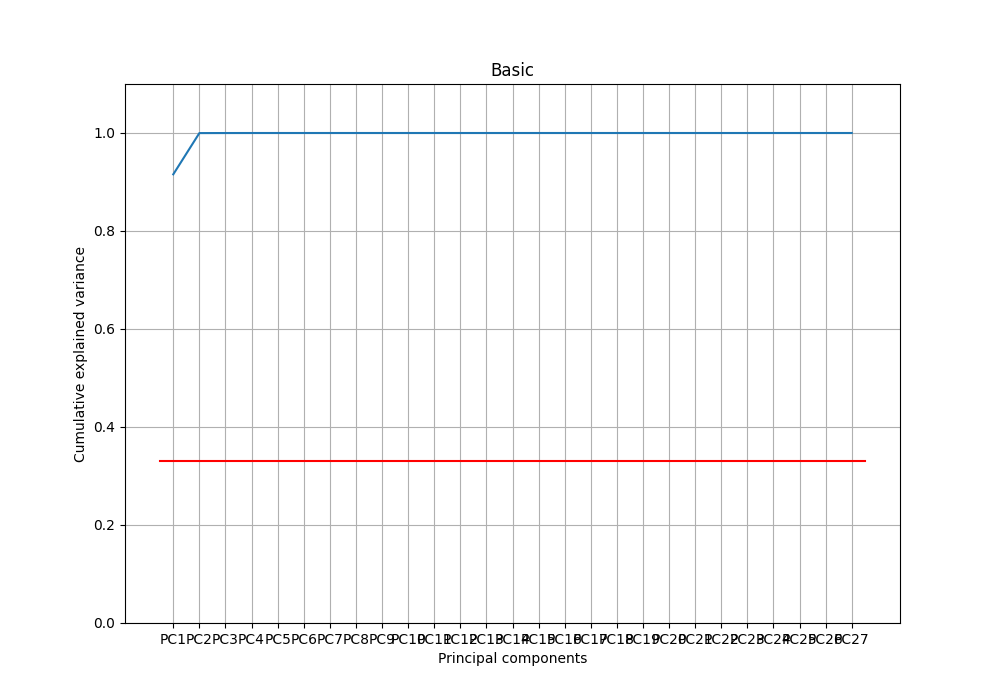

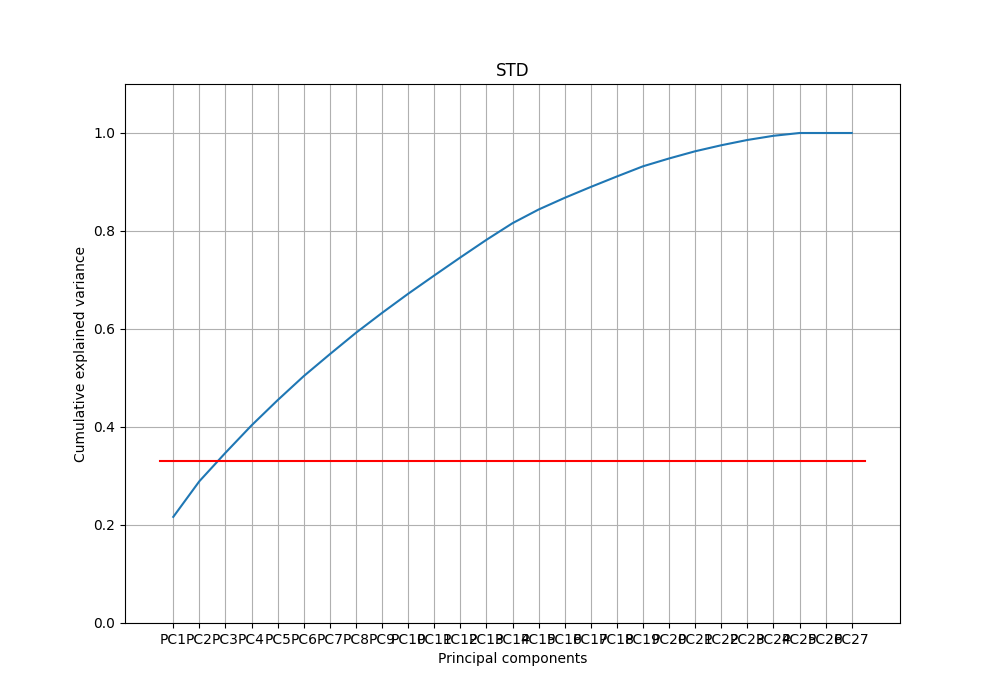

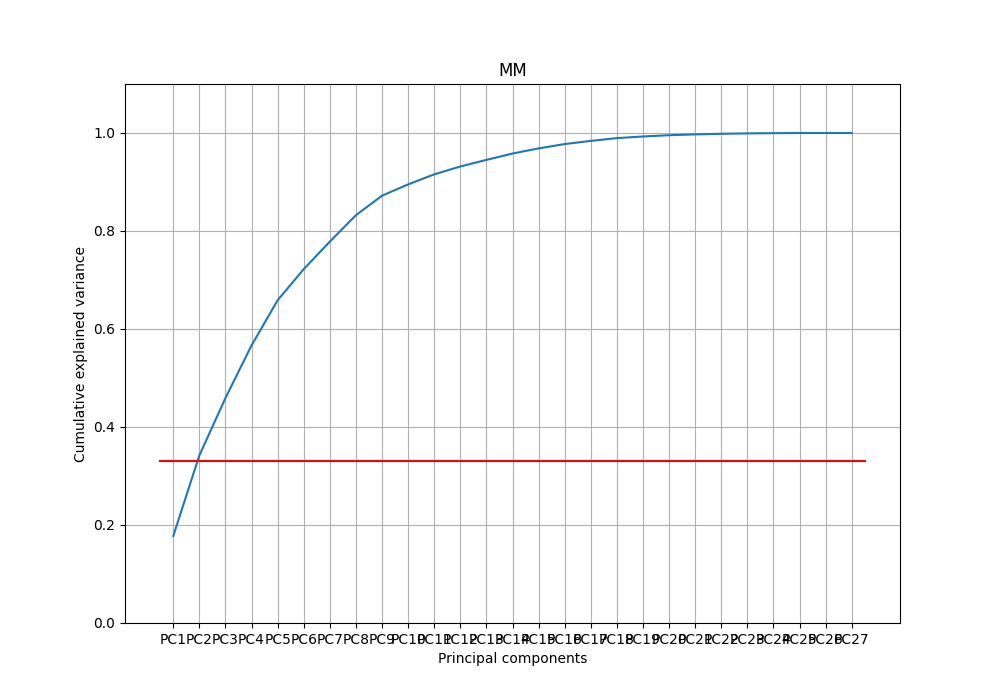

In [18]:
pca_Xworkdf_std = PCA()
pca_Xworkdf_mm = PCA()
pca_Xworkdf = PCA()

pca_Xworkdf_std.fit(Xworkdf_std)
pca_Xworkdf_mm.fit(Xworkdf_mm)
pca_Xworkdf.fit(Xworkdf.values)

eps = 0.33
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_Xworkdf.explained_variance_ratio_))
plt.plot([-0.5, pca_Xworkdf.n_features_in_ - 0.5], [eps, eps], 'red')
plt.title('Basic')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_Xworkdf_std.explained_variance_ratio_))
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.title('STD')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf_std.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf_std.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca_Xworkdf_mm.explained_variance_ratio_))
plt.plot([-0.5, pca_Xworkdf_mm.n_features_in_ - 0.5], [eps, eps], 'red')
plt.title('MM')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf_mm.n_features_in_),
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf_mm.n_features_in_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

As expected in the first graph we have all the variance explained already in the first PCA while in the other two standardized graphs we lose some information with the standardization obtaining a curve that reaches the 33% of the explained variance at PC3 for the second graph and PC2 for the last one.

# PART 4: Dimensionality Reduction and Interpretation of the PCs

**4.1)** As seen before the minimum number of PCA that explained 33% of the variance is 3 for *Standard Scaler* and 2 for *MinMax Scaler*.
For this reason we now applay PCA with respectively this number of components obtaining *Yworkdf_std* and *Yworkdf_mm*.

In [19]:
pca_Xworkdf_std = PCA(n_components=0.33)
pca_Xworkdf_mm = PCA(n_components=0.33)

pca_Xworkdf_std.fit(Xworkdf_std)
pca_Xworkdf_mm.fit(Xworkdf_mm)

Yworkdf_std = pca_Xworkdf_std.transform(Xworkdf_std)
Yworkdf_mm = pca_Xworkdf_mm.transform(Xworkdf_mm)

Yworkdf_std.shape, Yworkdf_mm.shape

((1474, 3), (1474, 2))

**4.2)** In order to give an interpretation to the PCs obtained from *Yworkdf_std* we plot the matrix of the correlation coefficients for each features.

In [20]:
loadings = pca_Xworkdf_std.components_
n_features = pca_Xworkdf_std.n_features_in_

features_names = Xworkdf.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['features_names'] = features_names
loadings_df = loadings_df.set_index('features_names')
loadings_df

PC1       PC2       PC3
features_names                                       
Year_Birth              -0.085610 -0.381719  0.202004
Income                   0.354173  0.065802  0.024722
Kidhome                 -0.278884 -0.088092  0.019811
Teenhome                -0.028371  0.415867 -0.354087
Dt_Customer             -0.029459 -0.079238  0.146110
MntWines                 0.317011  0.165416 -0.011669
MntFruits                0.283873 -0.196235  0.017003
MntMeatProducts          0.327879 -0.143493  0.131457
MntFishProducts          0.292659 -0.195343  0.050778
MntGoldProds             0.247566 -0.074337 -0.140660
NumWebPurchases          0.239660  0.216399 -0.196980
NumCatalogPurchases      0.339984 -0.012365  0.076325
NumStorePurchases        0.312257  0.095224 -0.049893
NumWebVisitsMonth       -0.270461  0.130703 -0.187551
Education_2n Cycle      -0.019684 -0.048837  0.235090
Education_Basic         -0.073934 -0.098784  0.174372
Education_Graduation     0.019670 -0.403978 -0.615626
Education_Master        -0.006253  0.156759  0.269620
Education_PhD            0.021364  0.415451  0.282595
Marital_Status_Absurd    0.017331 -0.023803  0.079737
Marital_Status_Alone    -0.017344 -0.016499  0.029229
Marital_Status_Divorced  0.011106  0.032247 -0.167697
Marital_Status_Married  -0.004592  0.031221  0.112469
Marital_Status_Single   -0.007453 -0.232799  0.101542
Marital_Status_Together -0.008664  0.106024 -0.068701
Marital_Status_Widow     0.031001  0.122727 -0.093875
Marital_Status_YOLO     -0.002680  0.061907 -0.007386

Here we can see the barplots with a red line that denote the threshold [-eps, +eps] to focus on the most significant correlations for each PC.

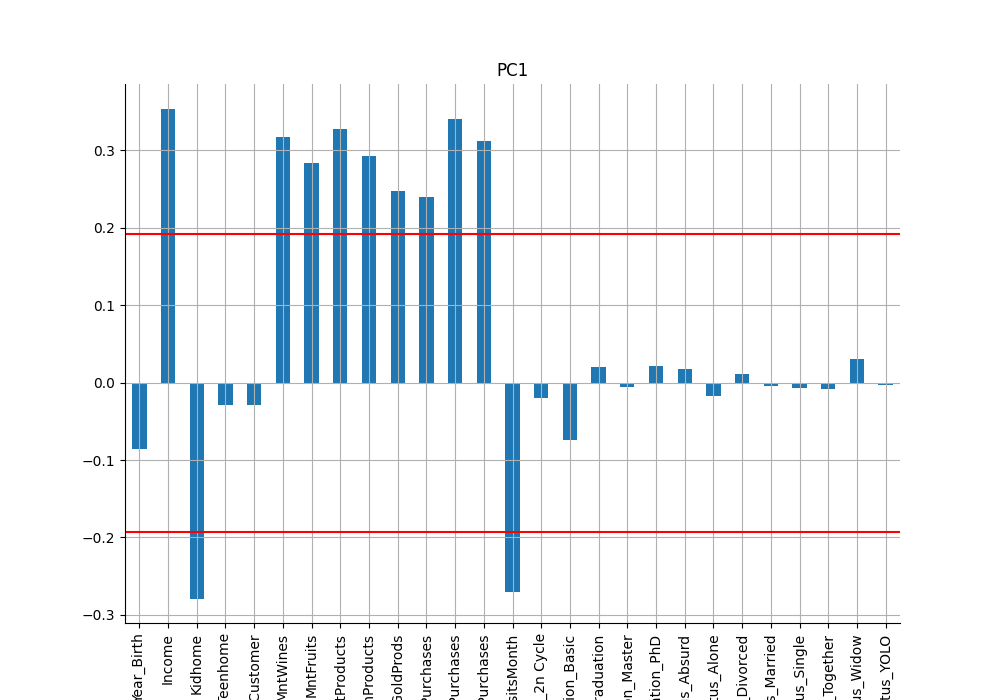

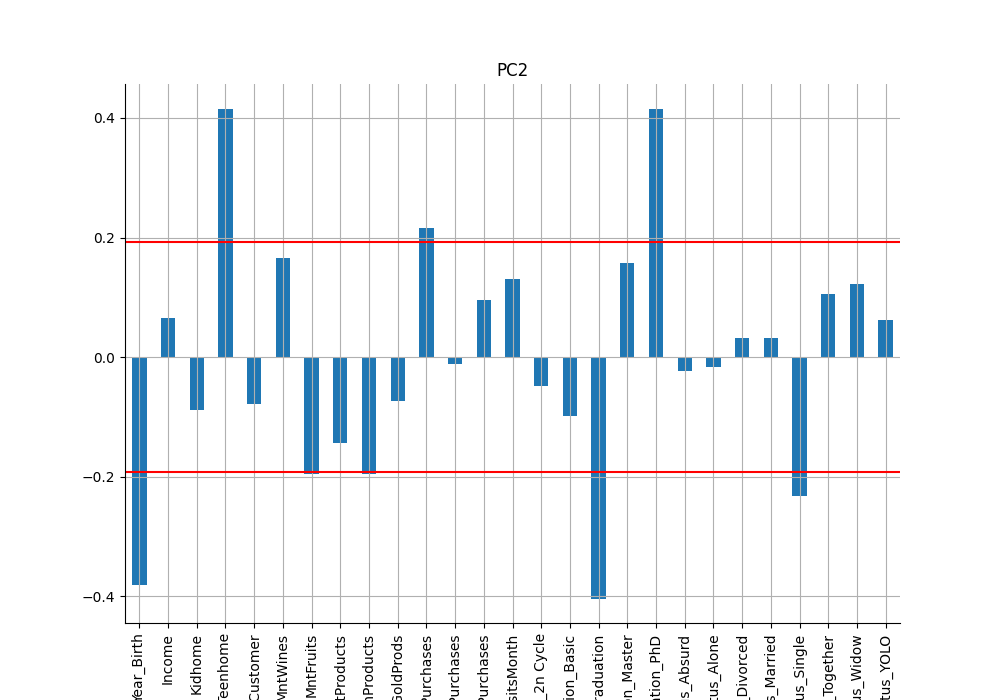

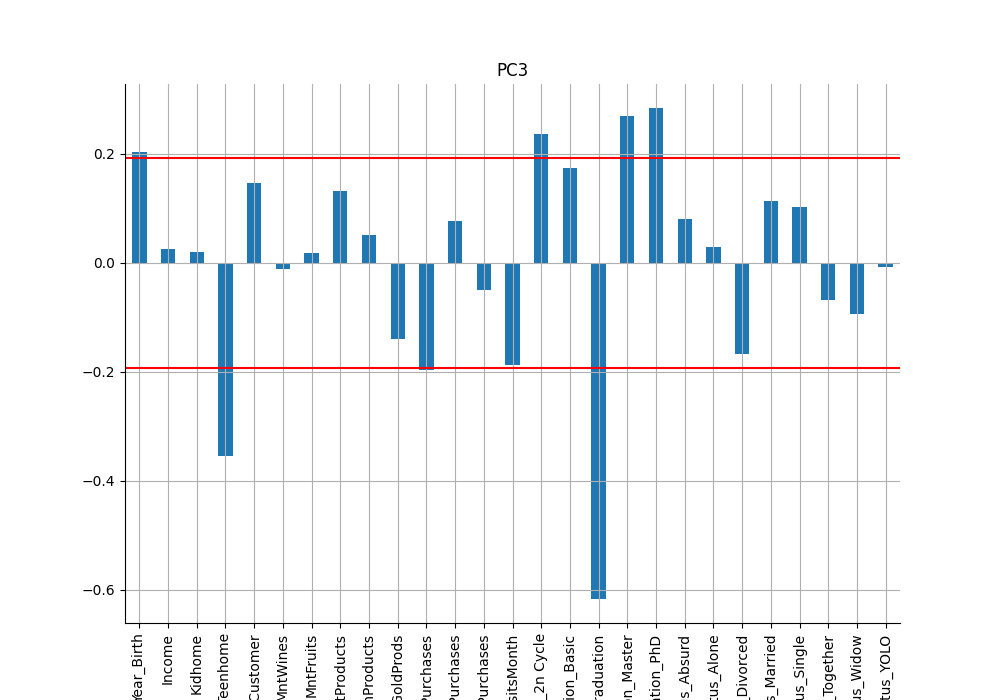

In [21]:
eps = np.sqrt(1 / pca_Xworkdf.n_features_in_)

plt.figure()
loadings_df['PC1'].plot(kind='bar', figsize=(10, 7), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [-eps, -eps], 'red')
plt.grid()
plt.show()

plt.figure()
loadings_df['PC2'].plot(kind='bar', figsize=(10, 7), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [-eps, -eps], 'red')
plt.grid()
plt.show()

plt.figure()
loadings_df['PC3'].plot(kind='bar', figsize=(10, 7), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [-eps, -eps], 'red')
plt.grid()
plt.show()

Looking at the barplots printed above we can see:

*   **PC1**: As income increases, the number of purchases for each category clearly increases both online and in stores while at the same time the number of kidhomes decreases as PC1 increases. We can also see that the number of web visits decrease while the PC1 increase.
*   **PC2**: As PC2 grows, the number of teenhomes and the age of customers increase because the year of birth has a negative correlation.
Furthermore, there is a positive correlation with the Phd level of education and a negative correlation with Graduation.
Finally, the negative correlation with single marital status is in line with the fact that these are families with children.
*   **PC3**: There is a small positive correlation with the year of birth so we have younger costumer and the fact that there is a negative correlation with teenhome is in line with this result.
Also we have a positive correlation with an high level of education and negative with the Graduation one.

Given the information summarized above we can assign these names to the PCS:

*   **PC1**: People with great purchasing power (**GPurchPower**)
*   **PC2**: Educated older adults with teenagers (**EdOlderWithTeen**)
*   **PC3**: Educated younger adults (**EdYounger**)

**4.3)** In order to give an interpretation to the PCs obtained from *Yworkdf_mm* we plot the matrix of the correlation coefficients for each features.

In [22]:
loadings = pca_Xworkdf_mm.components_
n_features = pca_Xworkdf_mm.n_features_in_

features_names = Xworkdf.columns

pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['features_names'] = features_names
loadings_df = loadings_df.set_index('features_names')
loadings_df

PC1       PC2
features_names                             
Year_Birth              -0.024682  0.009223
Income                   0.003756  0.003350
Kidhome                 -0.004229 -0.011790
Teenhome                 0.036171  0.007010
Dt_Customer             -0.001845  0.005102
MntWines                 0.036385  0.004260
MntFruits               -0.051193  0.014117
MntMeatProducts         -0.014782  0.000595
MntFishProducts         -0.046812  0.015026
MntGoldProds            -0.052388  0.010765
NumWebPurchases          0.004148  0.001832
NumCatalogPurchases      0.001022  0.001083
NumStorePurchases        0.005307  0.022141
NumWebVisitsMonth        0.007694 -0.001180
Education_2n Cycle       0.085836  0.004140
Education_Basic          0.017054 -0.004821
Education_Graduation    -0.812184  0.112494
Education_Master         0.219768 -0.050353
Education_PhD            0.489526 -0.061460
Marital_Status_Absurd    0.000738 -0.000409
Marital_Status_Alone     0.000306 -0.000628
Marital_Status_Divorced -0.031239 -0.057391
Marital_Status_Married   0.133586  0.815773
Marital_Status_Single   -0.121031 -0.232374
Marital_Status_Together  0.009638 -0.506482
Marital_Status_Widow     0.006544 -0.018011
Marital_Status_YOLO      0.001458 -0.000477

Here we can see the barplots with a red line that denote the threshold [-eps, +eps] to focus on the most significant correlations for each PC.

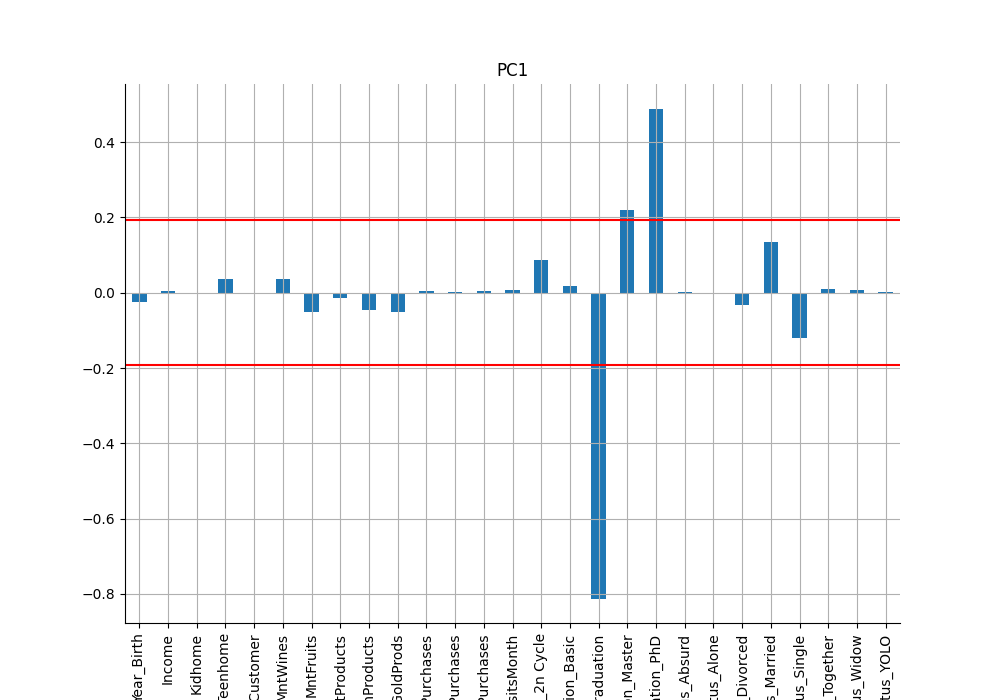

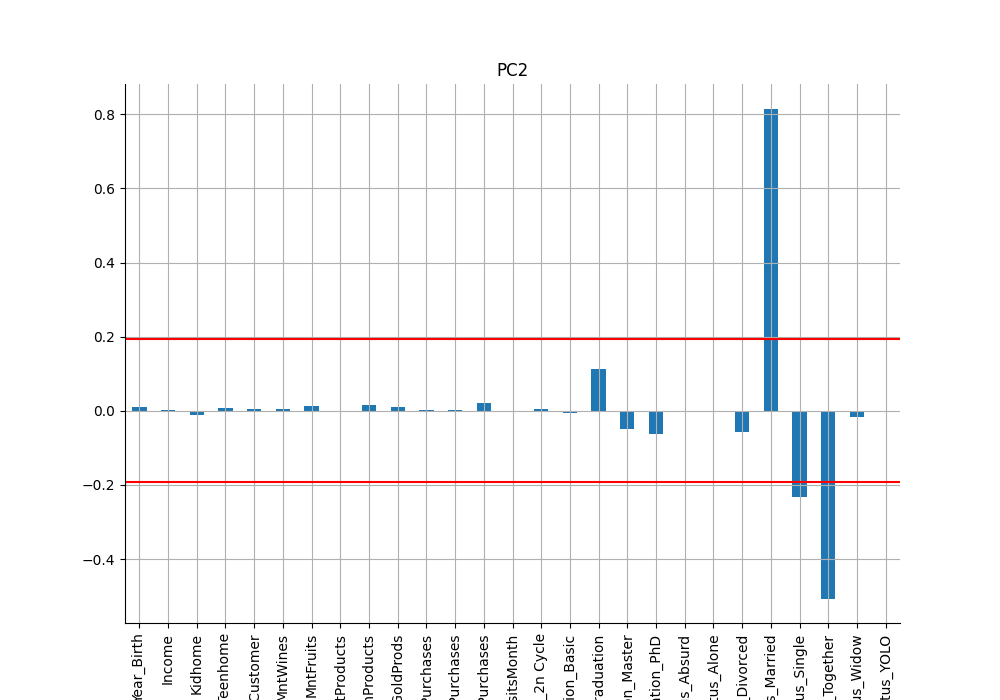

In [23]:
plt.figure()
loadings_df['PC1'].plot(kind='bar', figsize=(10, 7), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [-eps, -eps], 'red')
plt.grid()
plt.show()

plt.figure()
loadings_df['PC2'].plot(kind='bar', figsize=(10, 7), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_Xworkdf_std.n_features_in_ - 0.5], [-eps, -eps], 'red')
plt.grid()
plt.show()

Looking at the barplots printed above and following the same reasoning used before we can assign these names to the PCS:

*   **PC1**: People with high education (**HighEd**)
*   **PC2**: Married couple (**Married**)

**4.4)** Here we print the Score graph for both the DFs

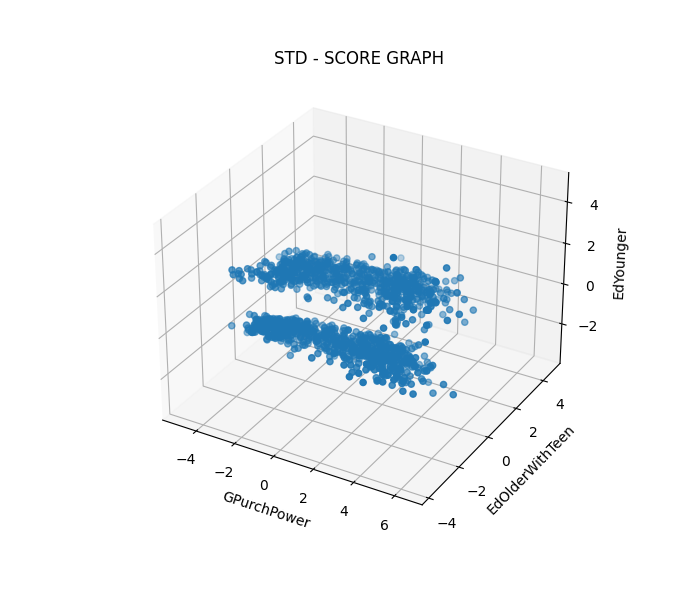

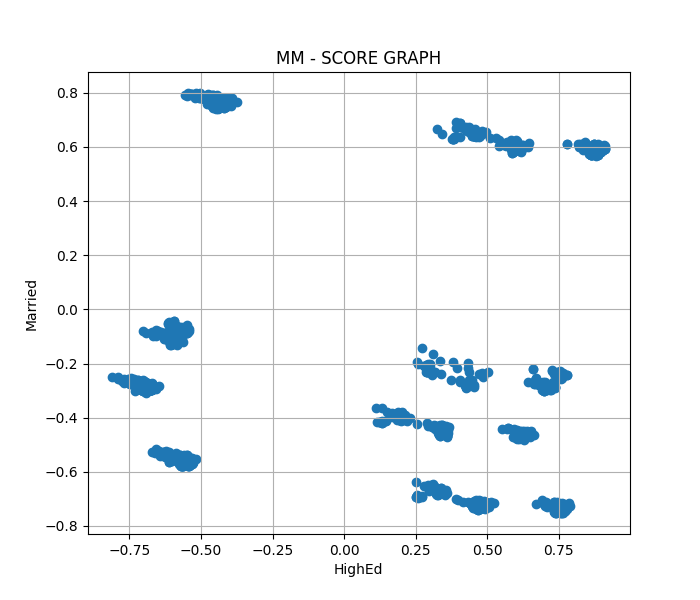

In [46]:
fig_std = plt.figure(figsize=(7, 6))
ax = fig_std.add_subplot(111, projection='3d')
ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2])
plt.title('STD - SCORE GRAPH')
ax.set_xlabel('GPurchPower')
ax.set_ylabel('EdOlderWithTeen')
ax.set_zlabel('EdYounger')
plt.grid()
plt.show()

plt.figure(figsize=(7, 6))
plt.scatter(Yworkdf_mm[:, 0], Yworkdf_mm[:, 1])
plt.title('MM - SCORE GRAPH')
plt.xlabel('HighEd')
plt.ylabel('Married')
plt.grid()
plt.show()

Given the results obtained previously when we analyzed the PCs, the most characteristic features seem to be for *Xworkdf_std*:

*   Education_Graduation
*   Income
*   Year_Birth




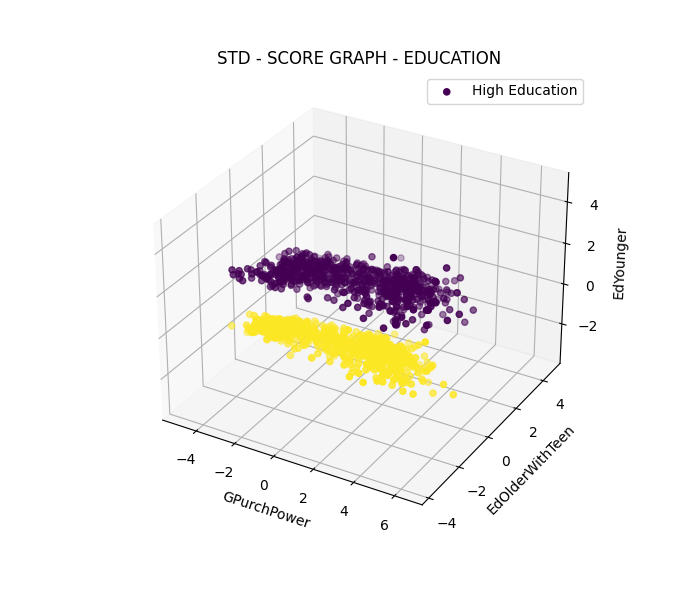

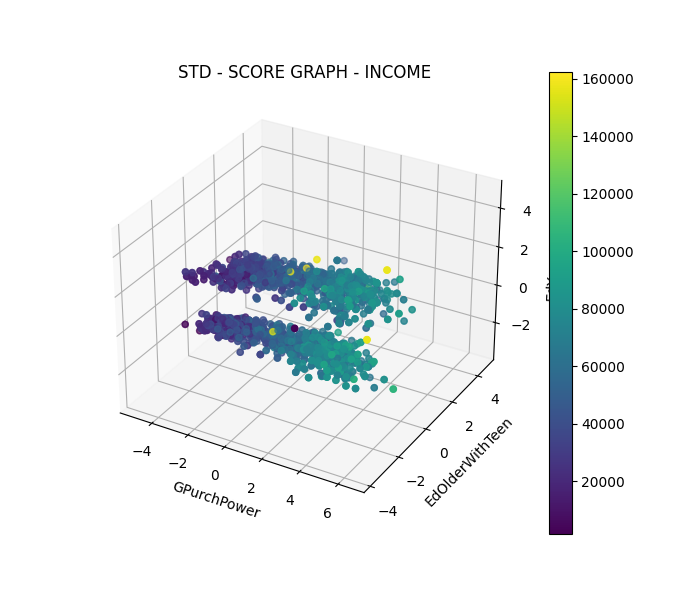

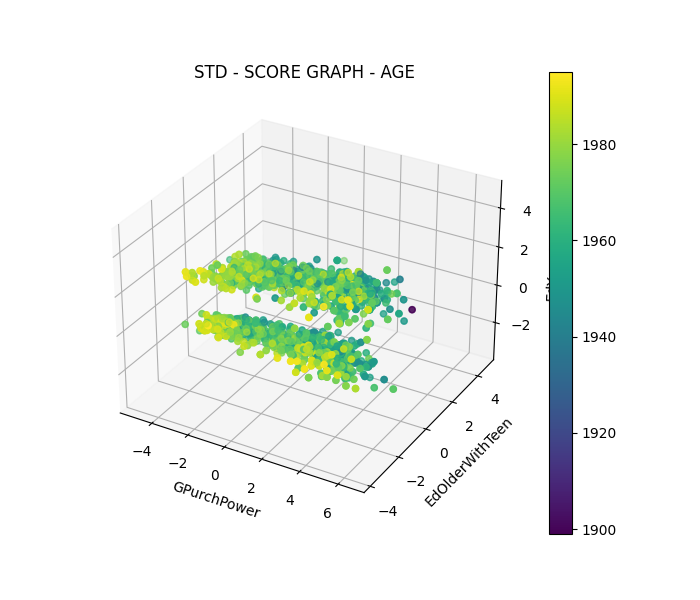

In [47]:
fig_std = plt.figure(figsize=(7, 6))
ax = fig_std.add_subplot(111, projection='3d')
ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2], c=Xworkdf['Education_Graduation'].values)
plt.legend(['High Education', 'Graduated'], frameon=True , loc='upper right', ncol = 2)
plt.title('STD - SCORE GRAPH - EDUCATION')
ax.set_xlabel('GPurchPower')
ax.set_ylabel('EdOlderWithTeen')
ax.set_zlabel('EdYounger')
plt.grid()
plt.show()

fig_std = plt.figure(figsize=(7, 6))
ax = fig_std.add_subplot(111, projection='3d')
ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2], c=Xworkdf['Income'].values)
cbar = plt.colorbar(ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2], c=Xworkdf['Income'].values))
plt.title('STD - SCORE GRAPH - INCOME')
ax.set_xlabel('GPurchPower')
ax.set_ylabel('EdOlderWithTeen')
ax.set_zlabel('EdYounger')
plt.grid()
plt.show()

fig_std = plt.figure(figsize=(7, 6))
ax = fig_std.add_subplot(111, projection='3d')
ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2], c=Xworkdf['Year_Birth'].values)
cbar = plt.colorbar(ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], Yworkdf_std[:, 2], c=Xworkdf['Year_Birth'].values))
plt.title('STD - SCORE GRAPH - AGE')
ax.set_xlabel('GPurchPower')
ax.set_ylabel('EdOlderWithTeen')
ax.set_zlabel('EdYounger')
plt.grid()
plt.show()

As we can see the **Education = Graduation** features divides exactly in two parts the score graph so probably we will have half of the clusters with a majority of people graduated and the other half with a majority of highly educated people.
From the other two score graph we can't do prevision about the division in cluster since we have that the income increases from left to right and that the age doesn't seem to follow a path.

While for *Xworkdf_mm*:


*   Education_Graduation
*   Marital_Status_Married


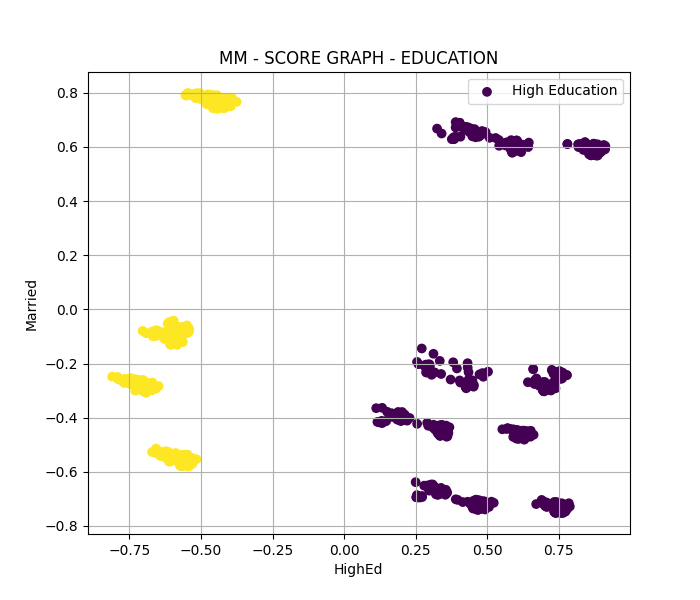

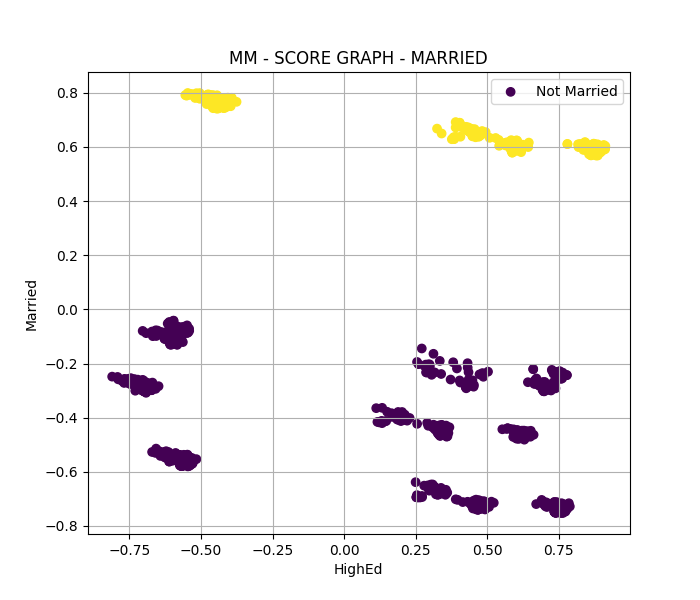

In [48]:
plt.figure(figsize=(7, 6))
plt.scatter(Yworkdf_mm[:, 0], Yworkdf_mm[:, 1], c=Xworkdf['Education_Graduation'].values)
plt.legend(['High Education', 'Graduated'], frameon=True, loc='upper right')
plt.title('MM - SCORE GRAPH - EDUCATION')
plt.xlabel('HighEd')
plt.ylabel('Married')
plt.grid()
plt.show()

plt.figure(figsize=(7, 6))
plt.scatter(Yworkdf_mm[:, 0], Yworkdf_mm[:, 1], c=Xworkdf['Marital_Status_Married'].values)
plt.legend(['Not Married', 'Married'], frameon=True, loc='upper right')
plt.title('MM - SCORE GRAPH - MARRIED')
plt.xlabel('HighEd')
plt.ylabel('Married')
plt.grid()
plt.show()

As we can see both Education_Graduation and Marital_Status_Married divide perfectly the DF in two groups each and probably we will have that the cluster will be divided in the four possible combination of this two features.

# PART 5: k-Means

**5.1)** Here we select the number of clusters for both the DFs using the silhouette coefficient.

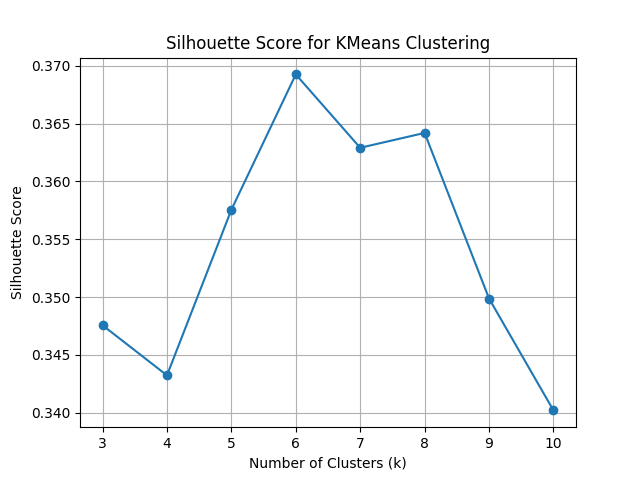

6


In [27]:
k_values = range(3, 11)
silhouette_scores_std = []

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)

    kmeans.fit(Yworkdf_std)

    silhouette_avg = silhouette_score(Yworkdf_std, kmeans.labels_)
    silhouette_scores_std.append(silhouette_avg)

plt.figure()
plt.plot(k_values, silhouette_scores_std, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.grid()
plt.show()

k_std=np.argmax(silhouette_scores_std)+3
print(k_std)

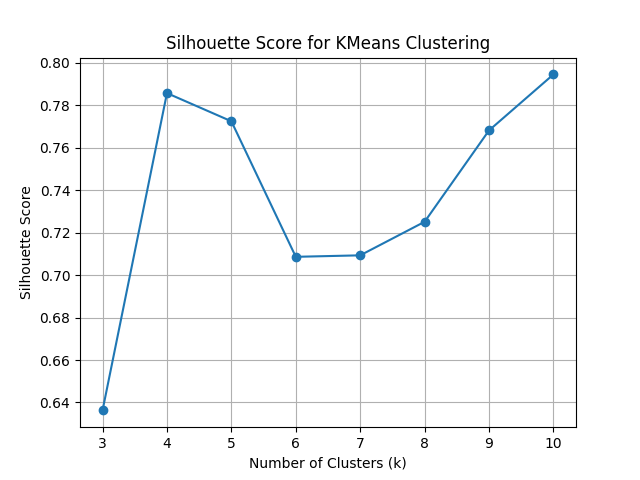

10


In [28]:
k_values = range(3, 11)
silhouette_scores_mm = []

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)

    kmeans.fit(Yworkdf_mm)

    silhouette_avg = silhouette_score(Yworkdf_mm, kmeans.labels_)
    silhouette_scores_mm.append(silhouette_avg)
plt.figure()
plt.plot(k_values, silhouette_scores_mm, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.grid()
plt.show()

k_mm=np.argmax(silhouette_scores_mm)+3
print(k_mm)

We obtained *k_std = 6* and *k_mm = 10* but we've decided to use *k_mm = 4* because there is an improvement too little in the silhouette coefficient to justify the computational cost derived from the use of 10 clusters instead of 4.

We have also computed the silhouette coefficient playing with the different configuaration of K-Means modifying its parameters. Initially we modified just one parameter at a time and subsequently we tried with different combinations of parameters. At the end we have seen that the configuration in the code gave us the best silhouette coefficient.

**5.2)** We now apply the k-Means algorithm to *Yworkdf_std* and *Yworkdf_mm* and then we print the barplot of each centroids with respect to the PCs.

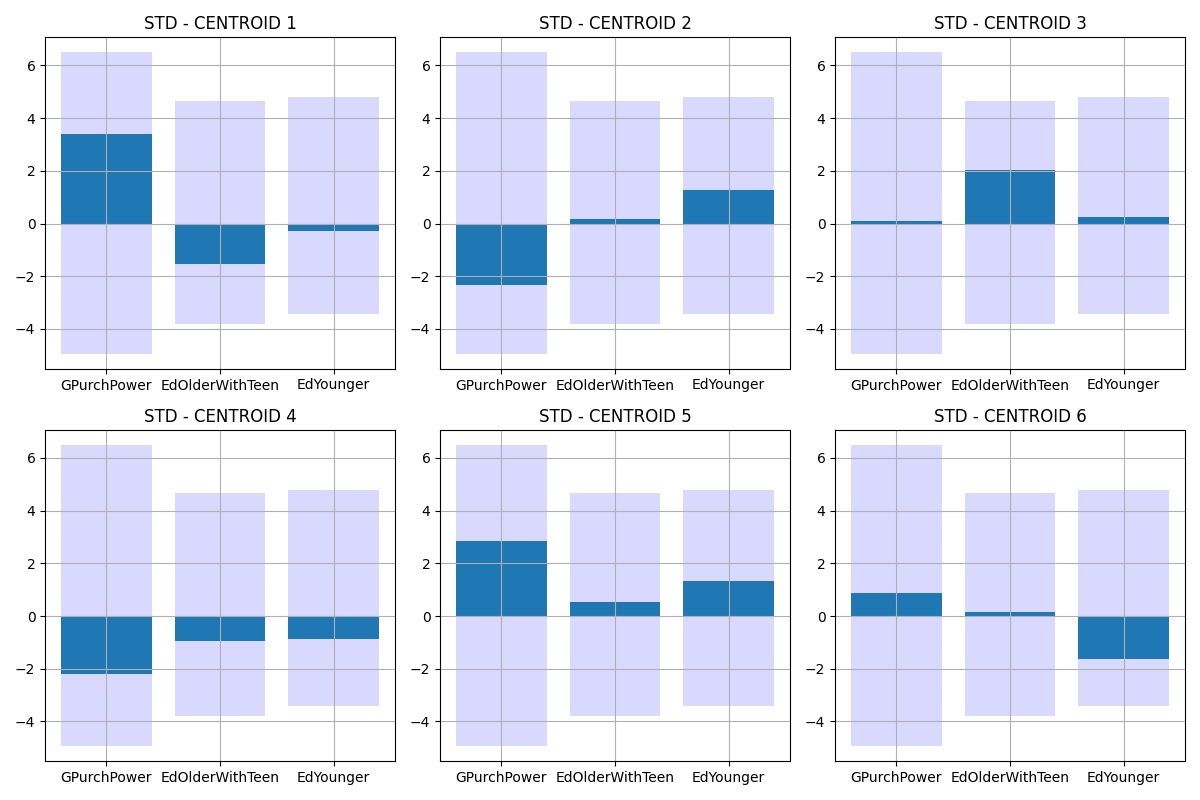

In [29]:
km_std = KMeans(n_clusters=k_std, random_state=rs, n_init=10)
km_std.fit(Yworkdf_std)

maxs_std_m = Yworkdf_std.max(axis=0)
mins_std_m = Yworkdf_std.min(axis=0)

STD_PC1 = "GPurchPower"
STD_PC2 = "EdOlderWithTeen"
STD_PC3 = "EdYounger"

fig_std, ax_std = plt.subplots(2, 3, figsize=(12, 8))

for ii in range(k_std):
    row, col = divmod(ii, 3)
    ax_std[row, col].bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_std_m, color='blue', alpha=0.15)
    ax_std[row, col].bar(np.arange(km_std.cluster_centers_.shape[1]), mins_std_m, color='blue', alpha=0.15)
    ax_std[row, col].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii, :])
    ax_std[row, col].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_std[row, col].set_xticklabels(labels=[STD_PC1, STD_PC2, STD_PC3], rotation=0)
    ax_std[row, col].grid(visible=True, which='both')
    ax_std[row, col].set_title(f'STD - CENTROID {ii+1}')

plt.tight_layout()
plt.show()


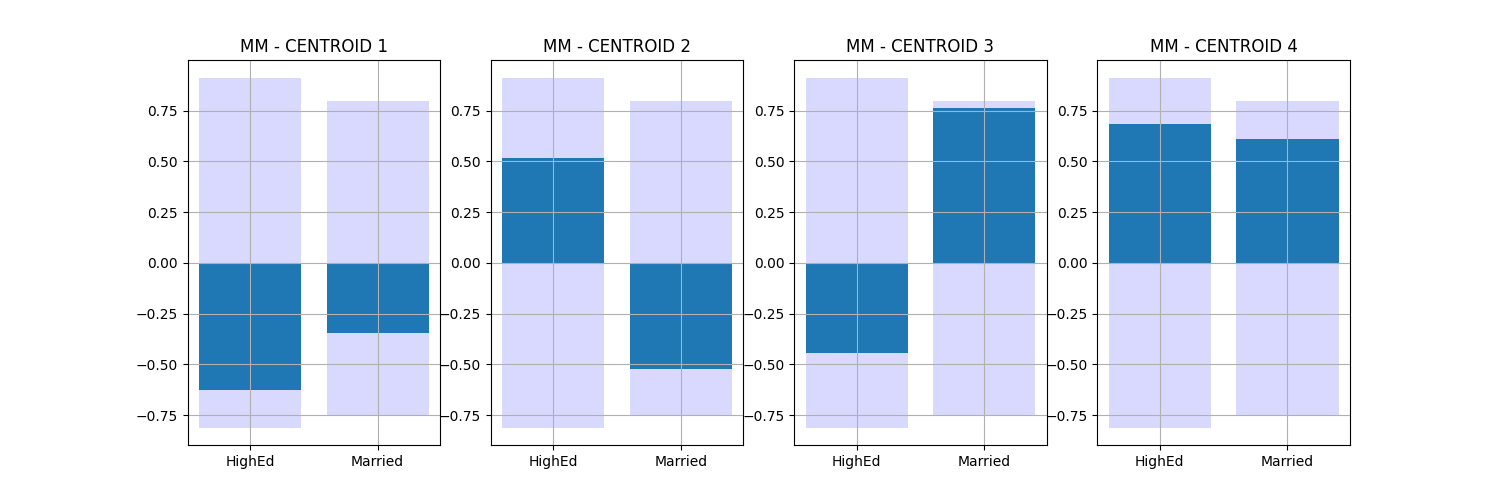

In [30]:
k_mm=4
km_mm = KMeans(n_clusters=k_mm, random_state=rs, n_init=10)

km_mm.fit(Yworkdf_mm)

maxs_mm_m = Yworkdf_mm.max(axis=0)
mins_mm_m = Yworkdf_mm.min(axis=0)

MM_PC1 = "HighEd"
MM_PC2 = "Married"

fig_mm, ax_mm = plt.subplots(1, k_mm, figsize=(15, 5))
for ii in range(k_mm):
    ax_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_mm_m, color='blue', alpha=0.15)
    ax_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_mm_m, color='blue', alpha=0.15)
    ax_mm[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii, :])
    ax_mm[ii].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
    ax_mm[ii].set_xticklabels(labels=[MM_PC1, MM_PC2], rotation=0)
    ax_mm[ii].grid(visible=True, which='both')
    ax_mm[ii].set_title(f'MM - CENTROID {ii+1}')


# PART 6: Clusters and Centroid Interpretation and Visualization

**Giving a Name to the Centroids**

Looking at the barplots printed in the previous section we now assign a brief descriptions and a name to the clusters corresponding to the centroids

**STD**:

*   **Centroid 1**:"People with great purchase power"
*   **Centroid 2**:"Educated younger people with low purchase power"
*   **Centroid 3**:"Educated older people with teen"
*   **Centroid 4**:"People with lower education, low purchase power and variable age"
*   **Centroid 5**:"Generally younger and educated people with great purchase power"
*   **Centroid 6**:"Mixed people group"

**MM**:

*   **Centroid 1**:"Low educated and not married"
*   **Centroid 2**:"High educated and not married"
*   **Centroid 3**:"Low educated and married"
*   **Centroid 4**:"High educated and married"



Thanks to what we have obtained we can visualize the clusters and the centroids on the score graph created in *Part 4*

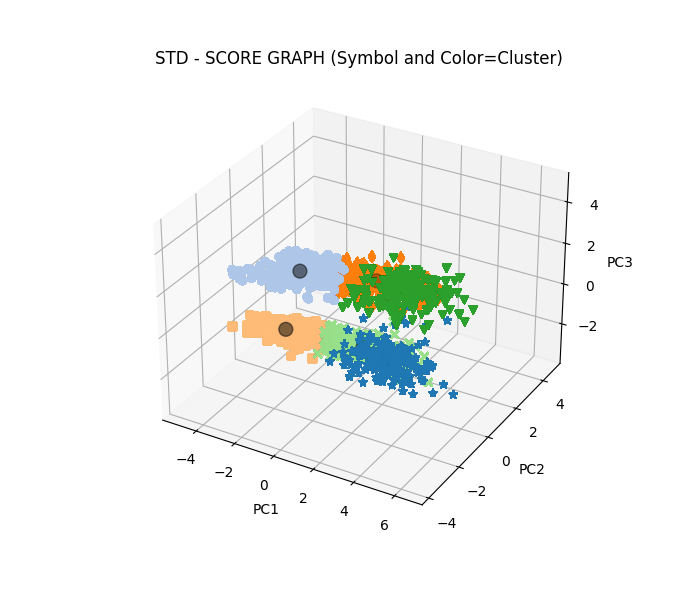

In [52]:
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: 's', 4: 'v', 5: 'x'}
colors = cm.tab20.colors

fig_std = plt.figure(figsize=(7, 6))
ax = fig_std.add_subplot(111, projection='3d')
for ll in km_std.labels_:
    ax.scatter(Yworkdf_std[km_std.labels_ == ll, 0], Yworkdf_std[km_std.labels_ == ll, 1], Yworkdf_std[km_std.labels_ == ll, 2], c=[colors[ll]], marker=markers_dict[ll], s =30)
ax.scatter(km_std.cluster_centers_[:, 0], km_std.cluster_centers_[:, 1], km_std.cluster_centers_[:, 2], c='black', marker='o', s = 100)
plt.title('STD - SCORE GRAPH (Symbol and Color=Cluster)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

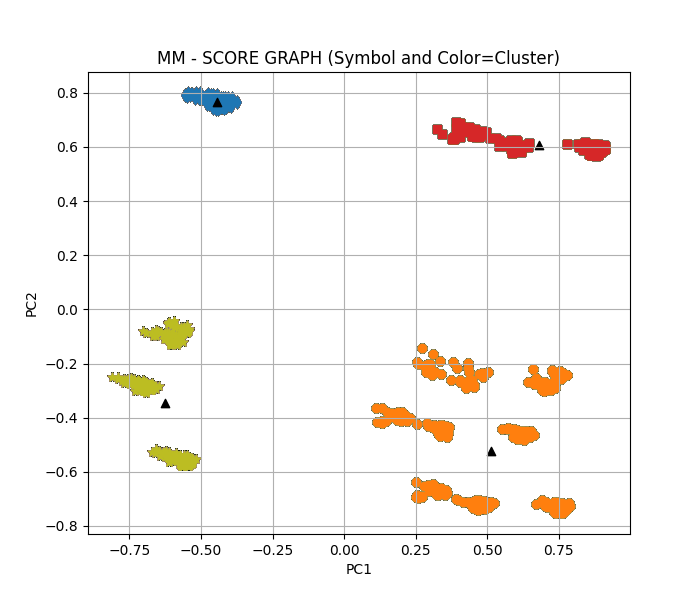

In [51]:
markers_dict = {0: '*', 1: 'o', 2: 'd', 3: 's'}
colors = cm.tab20.colors

plt.figure(figsize=(7, 6))
for ll in km_mm.labels_:
    plt.scatter(Yworkdf_mm[km_mm.labels_ == ll, 0], Yworkdf_mm[km_mm.labels_ == ll, 1], marker=markers_dict[ll])
plt.scatter(km_mm.cluster_centers_[:, 0], km_mm.cluster_centers_[:, 1], c='black', marker='^')
plt.title('MM - SCORE GRAPH (Symbol and Color=Cluster)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

The position of the clusters in both the score graph is congruent with the given names and with what was said in the *part 4*.

# PART 7: Clusters and Centroids Evaluation:

**7.1)** First of all we perform an internal evaluation mesuring the silhouette scores of each cluster for both DFs.

In [33]:
silhouette_values = silhouette_samples(Yworkdf_std, km_std.labels_)

average_silhouette_per_cluster = []

for cluster in range(k_std):
    cluster_mask = (km_std.labels_ == cluster)
    average_silhouette_cluster = np.mean(silhouette_values[cluster_mask])
    average_silhouette_per_cluster.append(average_silhouette_cluster)

print("Silhouette Score per Cluster:")
for i, score in enumerate(average_silhouette_per_cluster):
    print(f"Cluster {i+1}: {score}")

Silhouette Score per Cluster:
Cluster 1: 0.3670040682973015
Cluster 2: 0.38825748185596876
Cluster 3: 0.32474051449576197
Cluster 4: 0.4526144879123259
Cluster 5: 0.3104959296584292
Cluster 6: 0.3116217458966176


In [34]:
silhouette_values = silhouette_samples(Yworkdf_mm, km_mm.labels_)

average_silhouette_per_cluster = []

for cluster in range(k_mm):
    cluster_mask = (km_mm.labels_ == cluster)
    average_silhouette_cluster = np.mean(silhouette_values[cluster_mask])
    average_silhouette_per_cluster.append(average_silhouette_cluster)

print("Silhouette Score per Cluster:")
for i, score in enumerate(average_silhouette_per_cluster):
    print(f"Cluster {i+1}: {score}")

Silhouette Score per Cluster:
Cluster 1: 0.776330085873796
Cluster 2: 0.6708639945510131
Cluster 3: 0.9664071330321513
Cluster 4: 0.7972997720924935


As expected the shilhouette score of the *Xworkdf_std*'s cluster are worse than the ones of *Xworkdf_mm* because in the first case we have more clusters, six, and they aren't well divided as in the second case.

**7.2)** Then we perform an external evaluation analyzing and plotting the distribution of the most interesting labels inside each cluster for ***STD***.

In order to do this we have to analize the distribution of the labels in the dataset and then in the clusters:

* **Education = Graduation**

Label's distribution in the dataset Xworkdf:
1    752
0    722
Name: Education_Graduation, dtype: int64
Label's distribution in each cluster:
cluster  Education_Graduation
0        1                       194
         0                         8
1        0                       299
2        0                       218
3        1                       342
4        0                       196
5        1                       216
         0                         1
Name: Education_Graduation, dtype: int64


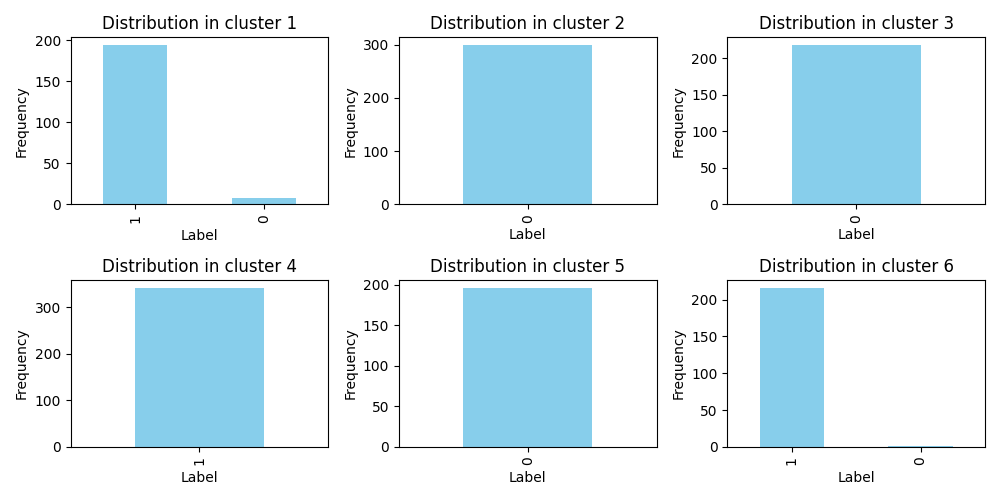

In [35]:
Xworkdf['cluster'] = km_std.labels_


label_distribution_total = Xworkdf['Education_Graduation'].value_counts()

print("Label's distribution in the dataset Xworkdf:")
print(label_distribution_total)

label_distribution_per_cluster = Xworkdf.groupby('cluster')['Education_Graduation'].value_counts()

print("Label's distribution in each cluster:")
print(label_distribution_per_cluster)

plt.figure(figsize=(10, 5))
for cluster in Xworkdf['cluster'].unique():
    plt.subplot(2, 3, cluster+1)
    label_distribution_per_cluster[cluster].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution in cluster {cluster + 1}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

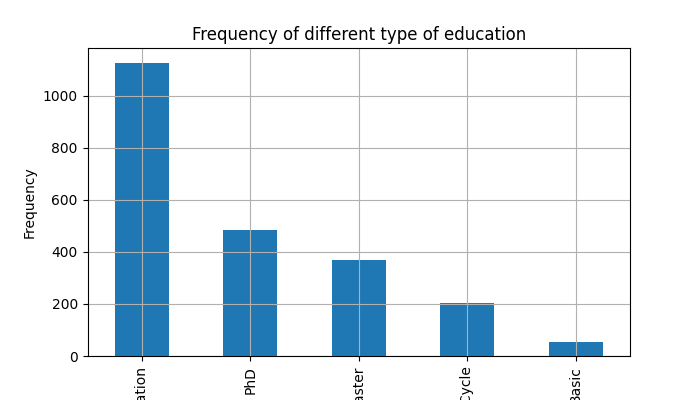

In [36]:
plt.figure(figsize=(7,4))
conteggio = df_tot['Education'].value_counts()
conteggio.plot(kind='bar')
plt.title('Frequency of different type of education')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Since the number of graduated people inside the dataset is more than half and that all the other type of education level are higher, except for "Education_Basic" that as you can see is a minimum part of the dataset, we can add some consideration about each cluster:

*   **Cluster 1**:"People with educational level graduated"
*   **Cluster 2**:"High educated people"
*   **Cluster 3**:"High educated people"
*   **Cluster 4**:"Graduated people"
*   **Cluster 5**:"People with high education"
*   **Cluster 6**:"People with educational level graduated"

* **Income**

Label's distribution in the dataset Xworkdf:
0    756
1    717
Name: Income_group, dtype: int64
Label's distribution in each cluster:
cluster  Income_group
0        1               199
         0                 3
1        0               280
         1                19
2        1               132
         0                86
3        0               324
         1                17
4        1               186
         0                10
5        1               164
         0                53
Name: Income_group, dtype: int64


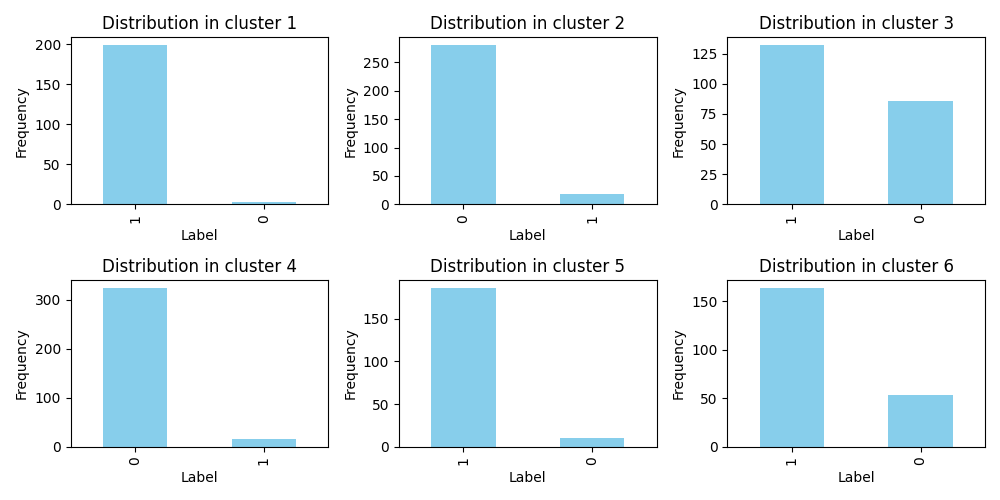

In [37]:
Xworkdf['cluster'] = km_std.labels_

mean_value = Xworkdf['Income'].mean()
min = Xworkdf['Income'].min()
max = Xworkdf['Income'].max()
Xworkdf['Income_group'] = pd.cut(Xworkdf['Income'], bins=[min, mean_value, max], labels=[0, 1])

label_distribution_total = Xworkdf['Income_group'].value_counts()

print("Label's distribution in the dataset Xworkdf:")
print(label_distribution_total)


label_distribution_per_cluster = Xworkdf.groupby('cluster')['Income_group'].value_counts()

print("Label's distribution in each cluster:")
print(label_distribution_per_cluster)

plt.figure(figsize=(10, 5))
for cluster in Xworkdf['cluster'].unique():
    plt.subplot(2, 3, cluster+1)
    label_distribution_per_cluster[cluster].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution in cluster {cluster + 1}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Now that we have discretized the *Income* column in two groups (0,1) we are able to better see the distribution and we can add some new consideration about each cluster:

*   **Cluster 1**:"People with educational level graduated and great purchease power"
*   **Cluster 2**:"High educated people with low purchease power"
*   **Cluster 3**:"High educated people with mixed purchease power""
*   **Cluster 4**:"Graduated people with low purchease power""
*   **Cluster 5**:"People with high education and great purchease power""
*   **Cluster 6**:"People with educational level graduated with high purchease power""

* **Age**

Label's distribution in the dataset Xworkdf:
1    809
0    664
Name: Year_Birth_group, dtype: int64
Label's distribution in each cluster:
cluster  Year_Birth_group
0        1                   116
         0                    86
1        1                   212
         0                    87
2        0                   148
         1                    70
3        1                   238
         0                   104
4        0                   103
         1                    92
5        0                   136
         1                    81
Name: Year_Birth_group, dtype: int64


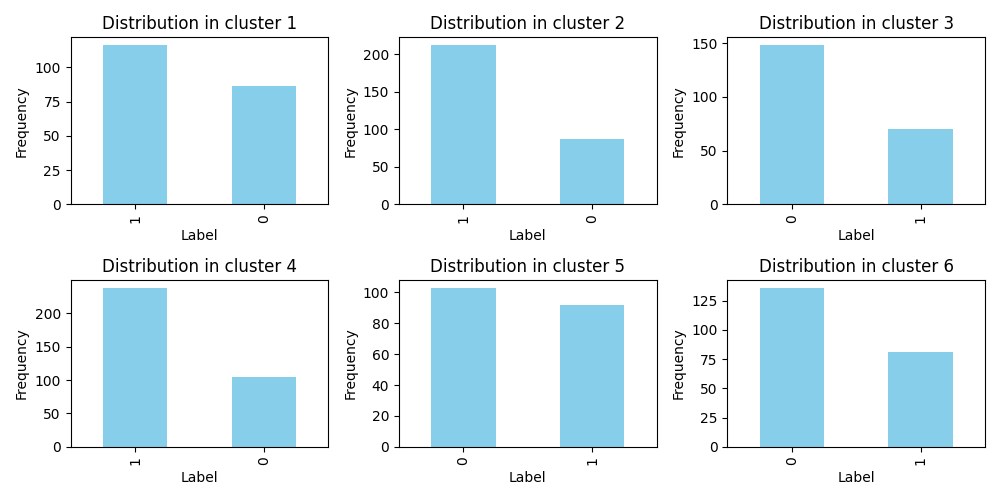

In [38]:
Xworkdf['cluster'] = km_std.labels_

mean_value = Xworkdf['Year_Birth'].mean()
min = Xworkdf['Year_Birth'].min()
max = Xworkdf['Year_Birth'].max()
Xworkdf['Year_Birth_group'] = pd.cut(Xworkdf['Year_Birth'], bins=[min, mean_value, max], labels=[0, 1])

label_distribution_total = Xworkdf['Year_Birth_group'].value_counts()

print("Label's distribution in the dataset Xworkdf:")
print(label_distribution_total)

label_distribution_per_cluster = Xworkdf.groupby('cluster')['Year_Birth_group'].value_counts()

print("Label's distribution in each cluster:")
print(label_distribution_per_cluster)

plt.figure(figsize=(10, 5))
for cluster in Xworkdf['cluster'].unique():
    plt.subplot(2, 3, cluster+1)
    label_distribution_per_cluster[cluster].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution in cluster {cluster + 1}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Here we have discretized the *Year of birth* column in two groups (0,1) as before to better see the distribution and we can add some new consideration about each cluster:

*   **Cluster 1**:"People with mixed age, educational level graduated and great purchease power"
*   **Cluster 2**:"Younger high educated people with low purchease power"
*   **Cluster 3**:"Older high educated people with mixed purchease power""
*   **Cluster 4**:"Younger graduated people with low purchease power""
*   **Cluster 5**:"People with high education, mixed age and great purchease power""
*   **Cluster 6**:"Generally older people with educational level graduated with high purchease power""

As we can see we have obtained a more precise description of the clusters with respect to the ones in *Part 6*, especially for cluster 4 that we wrongly interpreted and cluster 6 that we previously marked as *mixed group*.

While the others clusters remained almost the same but with more informations.

**7.3)** Then we perform an external evaluation analyzing and plotting the distribution of the most interesting labels inside each cluster for ***MM***.

In order to do this we have to analize the distribution of the labels in the dataset and then in the clusters (as in 7.2):

*  **Education = Graduation**

Label's distribution in the dataset Xworkdf:
1    752
0    722
Name: Education_Graduation, dtype: int64
Label's distribution in each cluster:
cluster  Education_Graduation
0        1                       469
1        0                       436
2        1                       283
3        0                       286
Name: Education_Graduation, dtype: int64


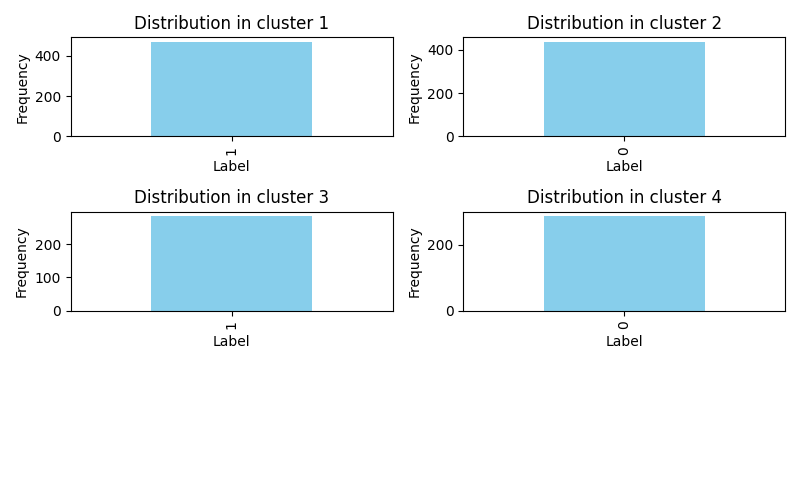

In [39]:
Xworkdf['cluster'] = km_mm.labels_

label_distribution_total = Xworkdf['Education_Graduation'].value_counts()

print("Label's distribution in the dataset Xworkdf:")
print(label_distribution_total)

label_distribution_per_cluster = Xworkdf.groupby('cluster')['Education_Graduation'].value_counts()

print("Label's distribution in each cluster:")
print(label_distribution_per_cluster)

plt.figure(figsize=(8, 5))
for cluster in Xworkdf['cluster'].unique():
    plt.subplot(3, 2, cluster+1)
    label_distribution_per_cluster[cluster].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution in cluster {cluster + 1}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*  **Marital Status = Married**

Label's distribution in the dataset Xworkdf:
0    905
1    569
Name: Marital_Status_Married, dtype: int64
Label's distribution in each cluster:
cluster  Marital_Status_Married
0        0                         469
1        0                         436
2        1                         283
3        1                         286
Name: Marital_Status_Married, dtype: int64


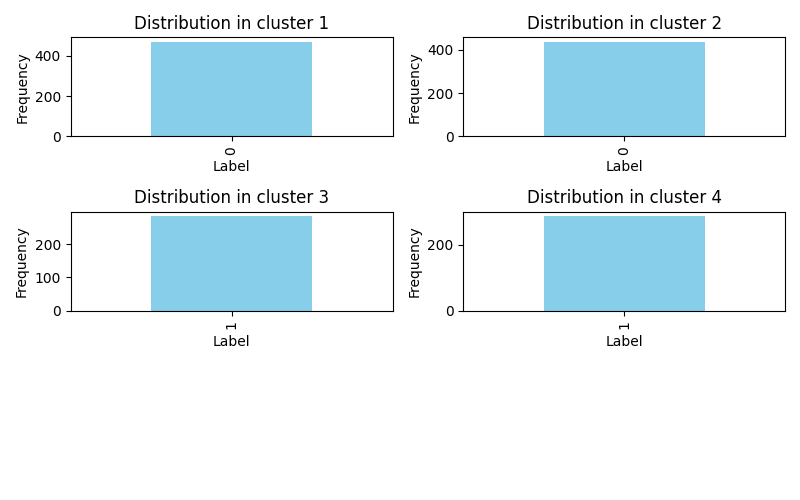

In [40]:
Xworkdf['cluster'] = km_mm.labels_

label_distribution_total = Xworkdf['Marital_Status_Married'].value_counts()

print("Label's distribution in the dataset Xworkdf:")
print(label_distribution_total)

label_distribution_per_cluster = Xworkdf.groupby('cluster')['Marital_Status_Married'].value_counts()

print("Label's distribution in each cluster:")
print(label_distribution_per_cluster)

plt.figure(figsize=(8, 5))
for cluster in Xworkdf['cluster'].unique():
    plt.subplot(3, 2, cluster+1)
    label_distribution_per_cluster[cluster].plot(kind='bar', color='skyblue')
    plt.title(f'Distribution in cluster {cluster + 1}')
    plt.xlabel('Label')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As expected the two labels are perfectly divided in the four clusters and this results are compatible with the description of the centroid given in *Part 6*.

**7.4) Comparison between the results of Xworkdf_std and Xworkdf_mm**

As we can see the PCA applied to the "*MinMax Scaler*" discretization has a better internal and external silhouette coefficient for each cluster and a more precise division of the labels with respect to the "*Standard Scaler*"  one but since they use different labels to divide the dataset they're both usefull to analyze the market and identify meaningful profiles of customers.